<a href="https://colab.research.google.com/github/amirrhseiin/Covid_Data_Visualization/blob/main/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.plotting import parallel_coordinates 

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [ ]:
dataset.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
years = []
months = []
days = []
time = []

for d in dataset.date:
  datetime_format = datetime.strptime(d , '%Y-%m-%d')
  year = datetime_format.year
  month = datetime_format.month
  day = datetime_format.day
  times = datetime_format

  years.append(year)
  months.append(month)
  days.append(day)
  time.append(times)

dataset['Year'] = years
dataset['Month'] = months
dataset['Day'] = days
dataset['datetime'] = time

In [ ]:
dataset.drop(columns=['date', 'tests_per_case'], inplace = True)

In [ ]:
len(dataset[dataset['location']=='Tongo'])

0

In [ ]:
(dataset[dataset['location']=='Falkland Islands'].isnull().sum().sum()) / (len(dataset[dataset['location']=='Falkland Islands']) * (len(dataset[dataset['location']=='Falkland Islands'].columns)))*100

80.64027687648712

In [ ]:
null_countries = []
country_list = dataset.location.unique()
for countries in country_list:
  each_country_data = dataset[dataset['location']==countries]
  if ( each_country_data.isnull().sum().sum() / (len(each_country_data) * (len(each_country_data.columns))) ) > 0.6:
    null_countries.append(countries)

In [ ]:
null_countries

['Africa',
 'Anguilla',
 'Aruba',
 'Asia',
 'Bermuda',
 'Bonaire Sint Eustatius and Saba',
 'British Virgin Islands',
 'Cayman Islands',
 'Cook Islands',
 'Curacao',
 'Dominica',
 'Europe',
 'European Union',
 'Faeroe Islands',
 'Falkland Islands',
 'French Polynesia',
 'Gibraltar',
 'Greenland',
 'Guernsey',
 'High income',
 'International',
 'Isle of Man',
 'Jersey',
 'Low income',
 'Lower middle income',
 'Macao',
 'Marshall Islands',
 'Micronesia (country)',
 'Monaco',
 'Montserrat',
 'Nauru',
 'New Caledonia',
 'Niue',
 'North America',
 'Northern Cyprus',
 'Oceania',
 'Palau',
 'Pitcairn',
 'Saint Helena',
 'Saint Kitts and Nevis',
 'Sint Maarten (Dutch part)',
 'South America',
 'Tokelau',
 'Tonga',
 'Turkmenistan',
 'Turks and Caicos Islands',
 'Tuvalu',
 'Upper middle income',
 'Vatican',
 'Wallis and Futuna']

In [ ]:
delete_index = dataset[dataset.location.isin(null_countries)].index

In [ ]:
len(dataset)

134235

In [ ]:
dataset.drop(delete_index, axis =0, inplace = True)

In [ ]:
len(dataset)

116239

In [ ]:
last_day_2020 = dataset[dataset['Year']==2020]
last_day_2020 = last_day_2020[last_day_2020['Month']==12]
last_day_2020 = last_day_2020[last_day_2020['Day']==31]

last_day_2020.drop(last_day_2020[last_day_2020['location']=='World'].index, axis=0, inplace=True)

In [ ]:
last_day_2020.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,Year,Month,Day,datetime
311,AFG,Asia,Afghanistan,52330.0,0.0,139.000,2189.0,0.0,9.000,1313.655,0.000,3.489,54.951,0.000,0.226,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511,NaN,NaN,NaN,NaN,2020,12,31,2020-12-31
1589,ALB,Europe,Albania,58316.0,589.0,498.429,1181.0,7.0,8.000,20298.413,205.017,173.491,411.078,2.437,2.785,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2350.0,247526.0,86.158,0.818,2208.0,0.769,0.226,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.48,2872934.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,5812.4,26.67,54.60,2023.158207,2020,12,31,2020-12-31
2222,DZA,Africa,Algeria,99610.0,299.0,371.857,2756.0,5.0,7.286,2232.576,6.702,8.334,61.771,0.112,0.163,0.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.22,44616626.0,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,NaN,NaN,NaN,NaN,2020,12,31,2020-12-31
2849,AND,Europe,Andorra,8049.0,66.0,50.000,84.0,0.0,0.143,104054.089,853.220,646.379,1085.917,0.000,1.847,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.78,77354.0,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,89.6,27.20,31.41,1158.311141,2020,12,31,2020-12-31
3458,AGO,Africa,Angola,17553.0,120.0,74.857,405.0,0.0,1.714,517.275,3.536,2.206,11.935,0.000,0.051,0.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,33933611.0,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,NaN,NaN,NaN,NaN,2020,12,31,2020-12-31


In [ ]:
map_data = {'continent':last_day_2020.continent,
      'country':last_day_2020.location,
      'iso_code':last_day_2020.iso_code,
      'total_cases_per_million':last_day_2020.total_cases_per_million,
      'datetime':last_day_2020.datetime}

world_df = pd.DataFrame(map_data)

In [ ]:
fig = px.scatter_geo(world_df, locations="iso_code", color="continent",
                     hover_name="country", size="total_cases_per_million",
                     projection="natural earth")
fig.show()

In [ ]:
last_day_2020.total_cases_per_million.isnull().sum()

0

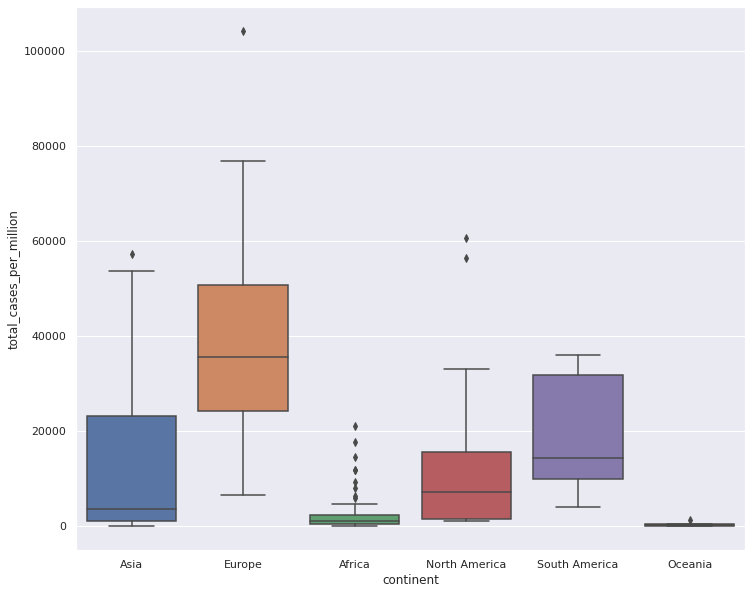

In [ ]:
plt.figure(figsize=(12, 10))
sns.set(style="darkgrid")

sns.boxplot(x= last_day_2020["continent"], y= last_day_2020["total_cases_per_million"])
plt.show()

In [ ]:
last_day_2020[last_day_2020['total_cases_per_million']>90000]

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,Year,Month,Day,datetime
2849,AND,Europe,Andorra,8049.0,66.0,50.0,84.0,0.0,0.143,104054.089,853.22,646.379,1085.917,0.0,1.847,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.78,77354.0,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,89.6,27.2,31.41,1158.311141,2020,12,31,2020-12-31


In [ ]:
Germany_data = dataset[dataset['location']=="Germany"]

In [ ]:
Germany_data.total_cases.isnull().sum()

0

In [ ]:
Germany_data.total_deaths.isnull().sum()

42

In [ ]:
Germany_first_death = Germany_data[Germany_data['Year']==2020]
Germany_first_death = Germany_first_death[Germany_first_death['Month']==3]
Germany_first_death = Germany_first_death[Germany_first_death['Day']==9]

In [ ]:
Germany_first_death

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,Year,Month,Day,datetime
45306,DEU,Europe,Germany,1176.0,136.0,145.286,2.0,2.0,0.286,14.017,1.621,1.732,0.024,0.024,0.003,2.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.7,83900471.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN,2020,3,9,2020-03-09


In [ ]:
Germany_data.total_deaths.fillna(0, inplace=True)
Germany_data.total_vaccinations.fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



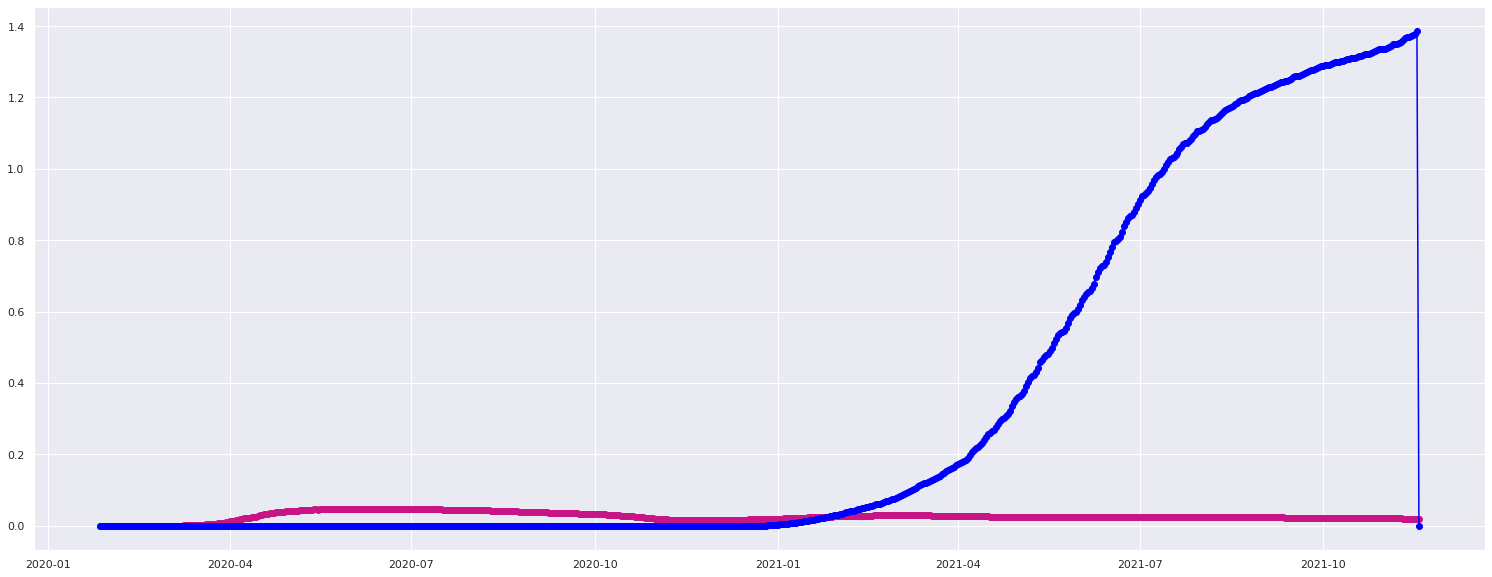

In [ ]:
sns.set_theme()
plt.figure(figsize=(26, 10))
plt.plot(Germany_data.datetime, (Germany_data.total_deaths/Germany_data.total_cases), marker='o', color='mediumvioletred')
plt.plot(Germany_data.datetime, (Germany_data.total_vaccinations / Germany_data.population), marker='o', color='blue')
plt.show()

In [ ]:
oct_2021 = dataset[dataset['Year']==2021]
oct_2021 = oct_2021[oct_2021['Month']==10]
oct_2021 = oct_2021[oct_2021['Day']==31]

oct_2021_africa = oct_2021[oct_2021['continent']=='Africa']

In [ ]:
oct_2021_africa.median_age.isnull().sum()

0

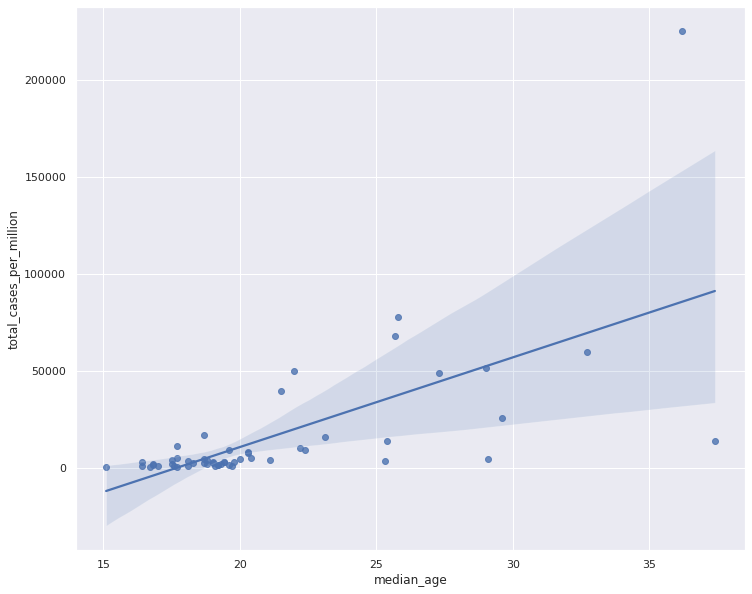

In [ ]:
plt.figure(figsize=(12, 10))
sns.regplot(x=oct_2021_africa['median_age'], y=oct_2021_africa["total_cases_per_million"])
plt.show()

In [ ]:
Eu_data = oct_2021[oct_2021['continent']=='Europe']

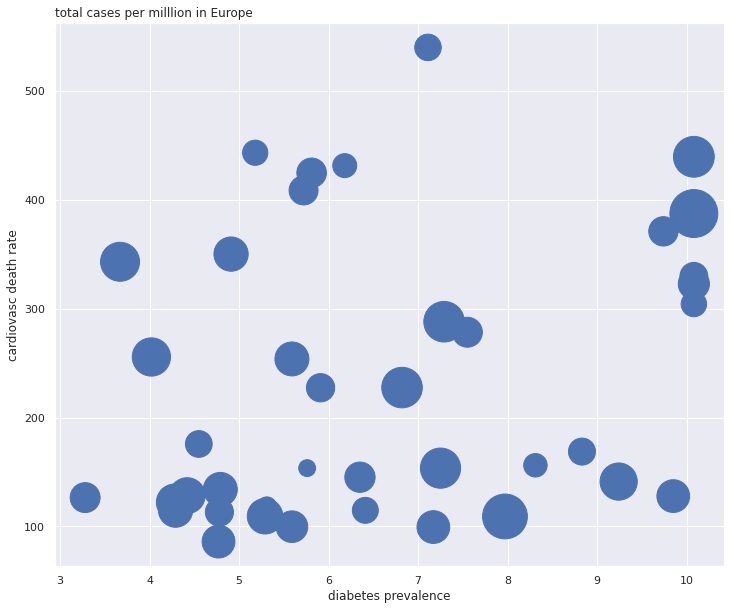

In [ ]:
plt.figure(figsize=(12, 10))
plt.scatter(Eu_data.diabetes_prevalence, Eu_data.cardiovasc_death_rate, s=Eu_data.total_cases_per_million*0.01)
plt.xlabel("diabetes prevalence")
plt.ylabel("cardiovasc death rate")
plt.title("total cases per milllion in Europe", loc="left")
plt.show()

In [ ]:
Asia_oct_2021 = oct_2021[oct_2021['continent']=='Asia']

In [ ]:
Asia_oct_2021.total_deaths_per_million.isnull().sum()

0

In [ ]:
Asia_oct_2021 = Asia_oct_2021[Asia_oct_2021.total_deaths_per_million < 100]

In [ ]:
Asia_map = {'country':Asia_oct_2021.location,
      'total_deaths_per_million':Asia_oct_2021.total_deaths_per_million,
      'stringency_index':Asia_oct_2021.stringency_index ,
      'life_expectancy':Asia_oct_2021.life_expectancy 
      }

Asia_map_df = pd.DataFrame(Asia_map)

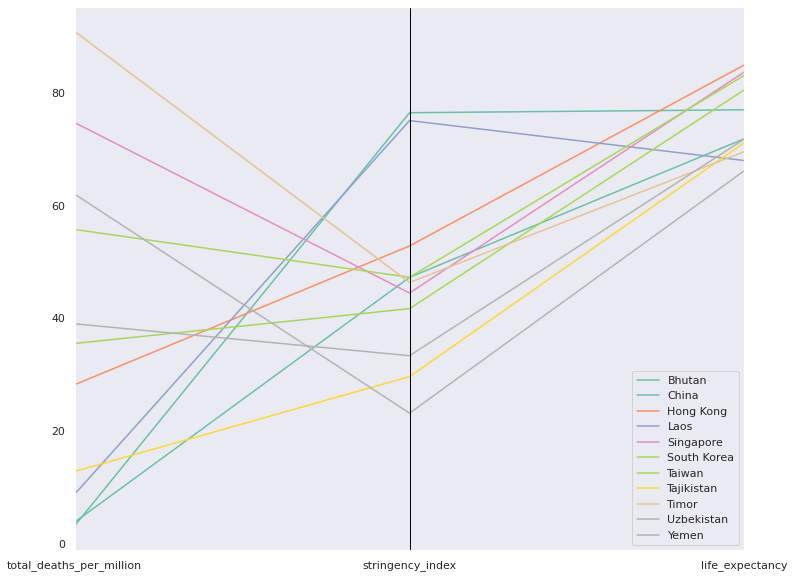

In [ ]:
plt.figure(figsize=(12, 10))
parallel_coordinates(Asia_map_df, 'country', colormap=plt.get_cmap("Set2"))
plt.legend(loc='lower right')
plt.show()